In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
credit = pd.read_table('Credit_score_10000.csv', sep=',')
credit.head(5)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
0,CUS_0x98ed,31,Journalist,22229.060,1672.421667,6,4,5,3,10,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,CUS_0x36b4,43,Musician,17060.705,1685.725417,8,3,11,4,24,...,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,CUS_0x105b,24,Accountant,34428.210,2575.017500,2,4,8,0,3,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,CUS_0x4c4a,21,Accountant,12613.920,1155.160000,4,6,13,3,14,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,CUS_0x612f,31,Journalist,34775.160,3048.930000,7,9,25,5,20,...,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor


Separating categorical and numerical features

In [78]:
# Extract numerical features and store them in X_num
X_num = credit[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 
            'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
            'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
            'Amount_invested_monthly', 'Monthly_Balance']].values

# Extract categorical features and store them in X_cat
X_cat = credit[['Customer_ID', 'Occupation', 'Credit_Mix', 'Last_Loan_9', 'Last_Loan_8', 'Last_Loan_7', 'Last_Loan_6', 'Last_Loan_5', 'Last_Loan_4', 
                 'Last_Loan_3', 'Last_Loan_2', 'Last_Loan_1', 'Payment_of_Min_Amount', 'Payment_Behaviour']].values

# Extract the target variable and store it in y
y = credit['Credit_Score'].values

# Print the shapes of the numerical, categorical, and target arrays
print(f'{"Numerical Feature Array Shape: ":<35} {X_num.shape}')
print(f'{"Categorical Feature Array Shape: ":<35} {X_cat.shape}')
print(f'{"Label Array Shape: ":<35} {y.shape}')

Numerical Feature Array Shape:      (10000, 17)
Categorical Feature Array Shape:    (10000, 14)
Label Array Shape:                  (10000,)


Encode the categorical variables using One-Hot Encoding

In [80]:
# Initialize and fit a OneHotEncoder on the categorical features
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_cat)

# Transform the categorical features using the fitted encoder
X_enc = encoder.transform(X_cat)

# Print the shape of the encoded feature array
print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (10000, 7225)


Combine numerical features with encoded categorical. 

In [82]:
# Combine numerical and encoded categorical features into one feature array
X = np.hstack((X_num, X_enc))

# Print the shape of the combined feature array
print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (10000, 7242)


Split into train, validation, and test

In [84]:
# Split the data into training and hold-out sets with stratified sampling
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Further split the hold-out set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

# Print the shapes of the training, validation, and test feature arrays to verify correct split
print(f'{"Training Features Shape: ":<30} {X_train.shape}')
print(f'{"Validation Features Shape: ":<30} {X_valid.shape}')
print(f'{"Test Features Shape: ":<30} {X_test.shape}')

Training Features Shape:       (7000, 7242)
Validation Features Shape:     (1500, 7242)
Test Features Shape:           (1500, 7242)


### Logistic Regression

In [86]:
# Initialize and train a Logistic Regression model
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty=None)
lr_mod.fit(X_train, y_train)

# Print the training and validation accuracy of the Logistic Regression model
print(f'{"Training Accuracy: ":<30} {round(lr_mod.score(X_train, y_train), 4)}')
print(f'{"Validation Accuracy: ":<30} {round(lr_mod.score(X_valid, y_valid), 4)}')

Training Accuracy:             0.614
Validation Accuracy:           0.6293


C:\Users\kelby\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [100]:
# Initialize lists to store training and validation accuracy for Decision Trees
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2,30)

# Loop through the depth range and train a Decision Tree for each depth
for d in depth_range:
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

# Find the optimal max_depth based on validation accuracy
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

# Print the optimal max_depth and corresponding training and validation accuracy
print(f'{"Optimal value for max_depth: ":<40} {dt_opt_depth}')
print(f'{"Training Accuracy for Optimal Model: ":<40} {round(dt_train_acc[dt_idx], 4)}')
print(f'{"Validation Accuracy for Optimal Model: ":<40} {round(dt_valid_acc[dt_idx], 4)}')

Optimal value for max_depth:             3
Training Accuracy for Optimal Model:     0.6994
Validation Accuracy for Optimal Model:   0.6873


Plot training and validation curve for visualization

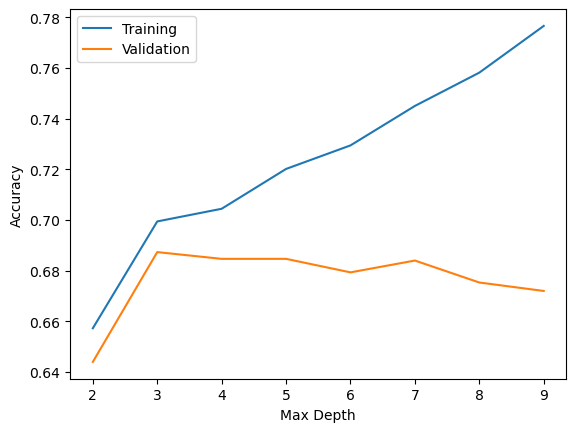

In [94]:
# Plot training and validation accuracy as a function of max_depth
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()

### Random Forest

In [102]:
# Initialize lists to store training and validation accuracy for Random Forests
rf_train_acc = []
rf_valid_acc = []

# Loop through the depth range and train a Random Forest for each depth
for d in depth_range:
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=1)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

# Find the optimal max_depth based on validation accuracy for Random Forests
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

# Print the optimal max_depth and corresponding training and validation accuracy for Random Forests
print(f'{"Optimal value for max_depth: ":<40} {rf_opt_depth}')
print(f'{"Training Accuracy for Optimal Model: ":<40} {round(rf_train_acc[rf_idx], 4)}')
print(f'{"Validation Accuracy for Optimal Model: ":<40} {round(rf_valid_acc[rf_idx], 4)}')

Optimal value for max_depth:             29
Training Accuracy for Optimal Model:     0.9041
Validation Accuracy for Optimal Model:   0.6907


Plot again for visualization

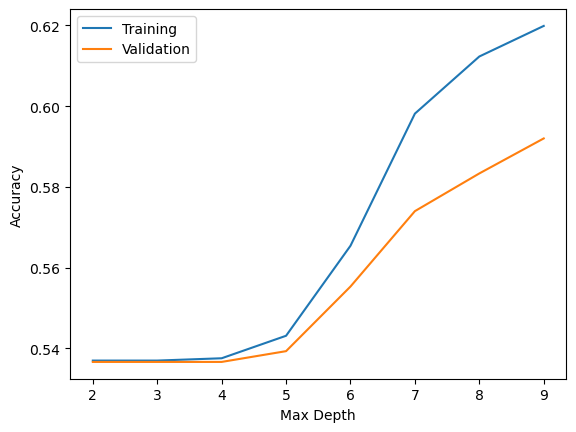

In [98]:
# Plot training and validation accuracy as a function of max_depth for Random Forests
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()

### Evaluating final model example

In [66]:
# Train the final Random Forest model with the optimal max_depth
final_model = RandomForestClassifier(n_estimators=100, max_depth=28, random_state=1)
final_model.fit(X_train, y_train)

# Print the training, validation, and test accuracy for the final model
print(f'{"Training Accuracy for Final Model: ":<40} {round(final_model.score(X_train, y_train), 4)}')
print(f'{"Validation Accuracy for Final Model: ":<40} {round(final_model.score(X_valid, y_valid), 4)}')
print(f'{"Testing Accuracy for Final Model: ":<40} {round(final_model.score(X_test, y_test), 4)}')

Training Accuracy for Final Model:       1.0
Validation Accuracy for Final Model:     0.6867
Testing Accuracy for Final Model:        0.6


Confusion Matrix

In [70]:
# Predict the test set labels using the final model
test_pred = final_model.predict(X_test)

# Create a confusion matrix from the test predictions
matrix = confusion_matrix(y_test, test_pred)

# Convert the confusion matrix to a DataFrame for better readability
matrix_df = pd.DataFrame(matrix, index=['1', '2', '3'], columns=['1', '2', '3'])

# Display the confusion matrix
matrix_df

,1,2,3
1,14,1,13
2,2,23,17
3,14,13,53


Classification report: 

In [74]:
# Print the classification report for the test predictions
print(classification_report(y_test, test_pred, target_names=['Column', 'Names', 'Labels']))

              precision    recall  f1-score   support

      Column       0.47      0.50      0.48        28
       Names       0.62      0.55      0.58        42
      Labels       0.64      0.66      0.65        80

    accuracy                           0.60       150
   macro avg       0.58      0.57      0.57       150
weighted avg       0.60      0.60      0.60       150



Precision is the percentage of time that it guessed positive and it was correct. <br /> 
Recall is the percentage of occurences where the model guessed positive out of all the total that were actually positive. <br/>
precision = true positives / (true positives + false positives **- occurrence was actually negative but model guessed positive**) <br />
recall = true_positives / (true positives + false negatives **- occurrence was actually positive but model guessed negative**)

Both precision and recall are essential, but their importance can vary based on your specific application: 

**Precision:** This is crucial when you want to minimize false positives. For instance, if you're developing a spam filter, you'd want high precision to ensure that legitimate emails aren't incorrectly marked as spam.

**Recall:** This is vital when you aim to minimize false negatives. For example, in medical diagnostics, you'd want high recall to ensure that as many true cases of a disease are identified as possible, even if it means having a few false positives.